# Questions and unanswered questions

# Main Data Frame
- Topics
- Users
- replies/conversations
- url count
- emoji

Using a variety of tools to get everything into one dataframe ready for analysis and visualisation in excel and Tableau

## Contents
1. import csv
2. basic cleaning and creation of text Blob
3. word counts of each post and of specific words in the whole text
4. Sentiment Analysis - Rating (good, neutral, poor)- per post and per user
5. Extract emoji to new column
6. Count url and delete from text
7. Remove stop words + symbols and noise you know of (maual addition to the stop words list)

## 1. import csv

In [51]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
df = pd.read_csv (r'general.csv')

In [3]:
df

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,27/04/2021 10:40,NaN,"just to warn you though, the whole zip file of...",NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,27/04/2021 10:40,siand,"because it contains text files with the links,...",NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,27/04/2021 10:40,siand,but yes i am sure you guys can wrangle it!,NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,27/04/2021 10:41,siand,just your average 200 mb file lol,NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(columns = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'])

In [5]:

df.shape

(630, 9)

In [6]:
df

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN
...,...,...,...,...,...,...,...,...,...
625,27/04/2021 10:40,NaN,"just to warn you though, the whole zip file of...",NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP
626,27/04/2021 10:40,siand,"because it contains text files with the links,...",NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP
627,27/04/2021 10:40,siand,but yes i am sure you guys can wrangle it!,NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP
628,27/04/2021 10:41,siand,just your average 200 mb file lol,NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP


## 2. basic cleaning and creation of text Blob

In [7]:
#Getting rid of empty fields in review text
df['text'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              597 non-null    object 
 1   name              397 non-null    object 
 2   text              597 non-null    object 
 3   subtype           0 non-null      float64
 4   num_reply         75 non-null     float64
 5   num_participants  0 non-null      float64
 6   user              597 non-null    object 
 7   thred_ts          438 non-null    float64
 8   parent_user_id    363 non-null    object 
dtypes: float64(4), object(5)
memory usage: 46.6+ KB


In [9]:
howdofeel = TextBlob("nice")
howdofeel.sentiment

Sentiment(polarity=0.6, subjectivity=1.0)

In [10]:
#random look into comments to check their nature
df['text'].iloc[6]

'I believe that is the same link'

In [11]:
df['text'].iloc[66]

'<https://zoom.us/j/877626245>\npw: 986565'

In [12]:
df.head()

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN


In [13]:
df['thanks'] = ''

In [14]:
# count and add thanks as a column
for a in df['text']:
    if re.findall(r'\thank', a):
        df['thanks'] = 1
    else:
        df['thanks'] = 0  


In [15]:
df.tail(50)

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,thanks
579,26/04/2021 06:54,NaN,"I missed that, but I want to go next time.",NaN,NaN,NaN,U01S79YDELR,1.619420e+09,U01RS9Y6UJH,0
580,26/04/2021 06:54,Thanh,"Yes, it was so pleasant to meet all of you!",NaN,NaN,NaN,U01RXCQHMHT,1.619420e+09,U01RS9Y6UJH,0
581,26/04/2021 06:56,NaN,I think the idea is to give more notice next t...,NaN,NaN,NaN,U01RS9Y6UJH,1.619420e+09,U01RS9Y6UJH,0
582,26/04/2021 07:15,Sam,as long weâ€™re all in some polyamorous relati...,NaN,NaN,NaN,U01S7KCL3DF,1.619420e+09,U01RS9Y6UJH,0
583,26/04/2021 07:37,siand,ironhack does not condone corona restriction r...,NaN,NaN,NaN,U01RW140HBP,1.619420e+09,U01RS9Y6UJH,0
584,26/04/2021 08:04,NaN,this one,NaN,3.0,NaN,U01RXCQHMHT,1.619424e+09,NaN,0
585,26/04/2021 12:00,Josephine,we start at 14:30 right? Sorry I'm not sure an...,NaN,NaN,NaN,U01RN7BVD1C,NaN,NaN,0
586,26/04/2021 12:09,NaN,Yes! Can someone share here the Dataset from K...,NaN,4.0,NaN,U01S081EULS,1.619439e+09,NaN,0
587,26/04/2021 12:11,NaN,<https://www.kaggle.com/carrie1/ecommerce-data>,NaN,NaN,NaN,U01S79YDELR,1.619439e+09,U01S081EULS,0
588,26/04/2021 12:12,NaN,do you want the file or is the link ok?,NaN,NaN,NaN,U01S79YDELR,1.619439e+09,U01S081EULS,0


In [16]:
#Pulling out the text from review text, ready for analysis. 
blob = [TextBlob(i) for i in df['text']]#

## 3. word counts of each post and of specific words in the whole text
What frequent words can we find?


In [17]:
# How many times did we say thanks: 
thanks = []

for a in range(len(blob)):
    x = blob[a].words.count('thanks')
    y = blob[a].words.count('thank you')
    c = blob[a].words.count('ta')
    thanks.append(x)
    thanks.append(y)
    thanks.append(c)
    
   

In [18]:
sum(thanks)
# it would be nice to have thanks as a column in the data frame - go back and do this. 

39

In [19]:
# How many times did we say nice: 
nice = []

for a in range(len(blob)):
    y = blob[a].words.count('nice')
    nice.append(y)
    

In [20]:
sum(nice)

7

In [21]:
# How many times did we say Does anyone: 
does_anyone = []

for a in range(len(blob)):
    y = blob[a].words.count('does')
    does_anyone.append(y)

In [22]:
sum(does_anyone)

8

In [23]:
# How many times did we say cool: 
cool = []

for a in range(len(blob)):
    y = blob[a].words.count('cool')
    cool.append(y)

In [24]:
sum(cool)

3

## 4. Sentiment Analysis - Rating (good, neutral, poor)- per post and per user

In [25]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None


In [26]:
df['polarity']=df['text'].apply(sentiment).apply(lambda x: x[0])


In [27]:
df.head(60)

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,thanks,polarity
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN,0,0.500000
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8,0,0.000000
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8,0,0.000000
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8,0,0.000000
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN,0,0.000000
5,23/03/2021 07:42,Thamo,"Same link as yesterday, the message is pinned ...",NaN,NaN,NaN,U01S7BM4N81,1.616485e+09,U01RS9Y6UJH,0,0.000000
6,23/03/2021 07:42,NaN,I believe that is the same link,NaN,NaN,NaN,U01S79YDELR,1.616485e+09,U01RS9Y6UJH,0,0.000000
7,23/03/2021 07:43,NaN,ok thanks,NaN,NaN,NaN,U01RS9Y6UJH,1.616485e+09,U01RS9Y6UJH,0,0.350000
8,23/03/2021 07:44,NaN,Thanks Thamo!,NaN,NaN,NaN,U01S79YDELR,NaN,NaN,0,0.250000
9,23/03/2021 07:44,Thamo,:v:welcome,NaN,NaN,NaN,U01S7BM4N81,NaN,NaN,0,0.000000


<AxesSubplot:xlabel='polarity', ylabel='Count'>

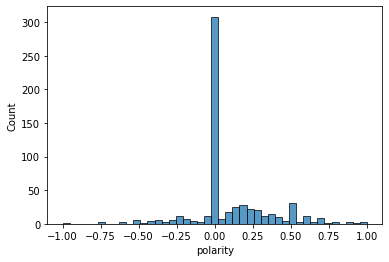

In [28]:
sns.histplot(df['polarity'])

In [29]:
PR = []
for i in df['polarity']:
    if i > 0.49:
        PR.append('Positive')
    elif i > 0:
        PR.append('Neutral')
    elif i == 0:
        PR.append('Na')
    else:
        PR.append('Negative')

In [30]:
df['p_rating'] = PR
df

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,thanks,polarity,p_rating
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN,0,0.500,Positive
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8,0,0.000,Na
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8,0,0.000,Na
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8,0,0.000,Na
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN,0,0.000,Na
...,...,...,...,...,...,...,...,...,...,...,...,...
625,27/04/2021 10:40,NaN,"just to warn you though, the whole zip file of...",NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,0,0.200,Neutral
626,27/04/2021 10:40,siand,"because it contains text files with the links,...",NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,0,0.000,Na
627,27/04/2021 10:40,siand,but yes i am sure you guys can wrangle it!,NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,0,0.625,Positive
628,27/04/2021 10:41,siand,just your average 200 mb file lol,NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,0,0.325,Neutral


## A sentiment rating per user

In [31]:
user_polrate = df.groupby(['user']).polarity.min()

In [32]:
user_polrate

user
U01RKN0EGDV   -0.312500
U01RN7BVD1C   -0.370833
U01RP2K1606    0.000000
U01RRV4JX6Z   -1.000000
U01RS9Y6UJH   -0.150000
U01RSRE0N3D   -0.500000
U01RUTP1ZQB   -0.300000
U01RUU9SK4K    0.150000
U01RV3K524T    0.075000
U01RW140HBP   -0.500000
U01RW2X7S9Z   -0.625000
U01RXCQHMHT   -0.400000
U01S081EULS    0.000000
U01S0E0MRJ7    0.000000
U01S0MFJ3HR    0.000000
U01S0P26NKD   -0.166667
U01S133DZ9A   -0.456250
U01S65G72SY    0.000000
U01S6L7HLUC    0.000000
U01S6LCPM0C    0.400000
U01S79YDELR   -0.500000
U01S7BM4N81   -0.500000
U01S7KCL3DF   -0.750000
U01SD3CDH9P   -0.750000
U01SJKB2MG8   -0.400000
U01SK96QF5E   -0.045833
Name: polarity, dtype: float64

In [33]:
user_polrate.to_csv('user_polrate.csv')

Maybe if you can group the conversations. You can apply this to get the sentiment ranking per conversation ? 

## 5. Extract emoji to new column

In [34]:
import numpy as np
df['emo']=df['text'].str.extract(r'\:(.*?)\:')

In [35]:
df.head(50)

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,thanks,polarity,p_rating,emo
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN,0,0.500000,Positive,NaN
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8,0,0.000000,Na,NaN
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8,0,0.000000,Na,NaN
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8,0,0.000000,Na,NaN
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN,0,0.000000,Na,NaN
5,23/03/2021 07:42,Thamo,"Same link as yesterday, the message is pinned ...",NaN,NaN,NaN,U01S7BM4N81,1.616485e+09,U01RS9Y6UJH,0,0.000000,Na,NaN
6,23/03/2021 07:42,NaN,I believe that is the same link,NaN,NaN,NaN,U01S79YDELR,1.616485e+09,U01RS9Y6UJH,0,0.000000,Na,NaN
7,23/03/2021 07:43,NaN,ok thanks,NaN,NaN,NaN,U01RS9Y6UJH,1.616485e+09,U01RS9Y6UJH,0,0.350000,Neutral,NaN
8,23/03/2021 07:44,NaN,Thanks Thamo!,NaN,NaN,NaN,U01S79YDELR,NaN,NaN,0,0.250000,Neutral,NaN
9,23/03/2021 07:44,Thamo,:v:welcome,NaN,NaN,NaN,U01S7BM4N81,NaN,NaN,0,0.000000,Na,v


## 6. Count  questions

In [36]:
Qu = []
Qcount = 0

In [37]:
for a in df['text']:
    x = re.search('\?', a)
    if x is None:
        Qu.append('no')
    else:
        Qu.append(a)
        Qcount += 1

In [38]:
Qcount

132

In [39]:
Qu

['no',
 'no',
 'same, can you give access to <mailto:andreatognoli001@gmail.com|andreatognoli001@gmail.com>, pls?',
 'no',
 'Letâ€™s try using Slack forâ€¦how do we join zoom today (and every morning) will a link be posted here?',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 '<https://ironhack.zoom.us/j/877626245?pwd=YjFtWlpiNHRDZzg4K0J5dWVKcHIzZz09>\n\nPinning this meeting link with the password as I am _that_ lazy',
 'no',
 'no',
 'no',
 "this one no good? i'll delete",
 'no',
 'no',
 'no',
 'did you open the link in the navigator?',
 'no',
 '<!channel>,\ncan you access the content now? We changed permissions\n<https://data-ft-ber-03-2021.slack.com/archives/C01RKRMS10W/p1616443201022100>',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'what happened? did you have to do something special',
 'no',
 'no',
 'no',
 'maybe worth clearing the cache or something ?',
 'no',
 'it doesnt show up the docx file attached?',
 "On histograms in Excel....I thought

In [40]:
df['questions'] = Qu

In [41]:
df.tail(20)

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,thanks,polarity,p_rating,emo,questions
610,27/04/2021 07:45,Sam,most importantly: walking distance from home :...,NaN,NaN,NaN,U01S7KCL3DF,1.619508e+09,U01RW140HBP,0,0.450000,Neutral,walking distance from home,no
611,27/04/2021 08:31,Sam,<https://company.onefootball.com/jobs/data-ana...,NaN,NaN,NaN,U01S7KCL3DF,1.619508e+09,U01RW140HBP,0,-0.416667,Negative,disappointed,no
612,27/04/2021 08:33,siand,oh the sports analysis industry is massively c...,NaN,NaN,NaN,U01RW140HBP,1.619508e+09,U01RW140HBP,0,0.116667,Neutral,NaN,no
613,27/04/2021 10:29,NaN,sorry,NaN,NaN,NaN,U01RW140HBP,NaN,NaN,0,-0.500000,Negative,NaN,no
614,27/04/2021 10:29,siand,If you find yourself with some downtime this a...,NaN,12.0,NaN,U01RW140HBP,1.619519e+09,NaN,0,0.317411,Neutral,NaN,If you find yourself with some downtime this a...
615,27/04/2021 10:30,siand,( i find bad news when delivered by a cute dog...,NaN,1.0,NaN,U01RW140HBP,1.619519e+09,NaN,0,0.162500,Neutral,NaN,( i find bad news when delivered by a cute dog...
616,27/04/2021 10:30,Thamo,Is there an easy way to copy those notion page...,NaN,NaN,NaN,U01S7BM4N81,1.619519e+09,U01RW140HBP,0,0.433333,Neutral,NaN,Is there an easy way to copy those notion page...
617,27/04/2021 10:30,Thamo,defo!,NaN,NaN,NaN,U01S7BM4N81,1.619519e+09,U01RW140HBP,0,0.000000,Na,NaN,no
618,27/04/2021 10:30,Thanh,it's probably not possible to copy the whole B...,NaN,NaN,NaN,U01RXCQHMHT,1.619519e+09,U01RW140HBP,0,0.039286,Neutral,NaN,it's probably not possible to copy the whole B...
619,27/04/2021 10:31,siand,not sureâ€¦ feel free to explore! i havent fou...,NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,0,0.600000,Positive,NaN,no


In [42]:
len(Qu)

597

## 7. Remove stop words + symbols and noise you know of (maual addition to the stop words list)

In [43]:
#Copy paste a list of stop words from the internet: https://gist.github.com/sebleier/554280. + added a few I spotted at the front of the list
stop_words = ["<", ">", "< @","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "can", "will", "just", "don", "should", "now"]

In [44]:
for a in df['text']:
    [word for word in a if not word in stop_words]

In [45]:
df.head(5)

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,thanks,polarity,p_rating,emo,questions
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN,0,0.5,Positive,NaN,no
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8,0,0.0,Na,NaN,no
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8,0,0.0,Na,NaN,"same, can you give access to <mailto:andreatog..."
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8,0,0.0,Na,NaN,no
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN,0,0.0,Na,NaN,Letâ€™s try using Slack forâ€¦how do we join z...


# 8. Repeated noun-phrases and repeated triplets by row

In [46]:
subject_indicators = ['Code wars',
'Linear regression',
'Lab work',
'Student portal',
'Mornings lecture',
'Breakout room',
'Survey',
'Thamo',
'Sian',
'Kosta',
'Flo',
'Smote',
'script',
'function',
'histograms',
'Lab work',
'student portal',
'submitted',
'mystery room',
'Easter egg hunt',
'Survey',
'SQL',
'films',
'mornings lecture',
'miro board',
'main room',
'student portal',
'notion calendar',
'Logisitic regression',
'weekly survey',
'breakout room',
'teaching team',
'reminder',
'Stand up',
'zoom classroom',
'presentation on',
'main room'
]

In [47]:
df['keyword'] = ""

In [48]:
for a in df['text']:
    [df['keyword'].append(word) for word in a if word in subject_indicators]

In [49]:
df.tail(50)

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,thanks,polarity,p_rating,emo,questions,keyword
579,26/04/2021 06:54,NaN,"I missed that, but I want to go next time.",NaN,NaN,NaN,U01S79YDELR,1.619420e+09,U01RS9Y6UJH,0,0.000000,Na,NaN,no,
580,26/04/2021 06:54,Thanh,"Yes, it was so pleasant to meet all of you!",NaN,NaN,NaN,U01RXCQHMHT,1.619420e+09,U01RS9Y6UJH,0,0.916667,Positive,NaN,no,
581,26/04/2021 06:56,NaN,I think the idea is to give more notice next t...,NaN,NaN,NaN,U01RS9Y6UJH,1.619420e+09,U01RS9Y6UJH,0,0.250000,Neutral,face_with_rolling_eyes,no,
582,26/04/2021 07:15,Sam,as long weâ€™re all in some polyamorous relati...,NaN,NaN,NaN,U01S7KCL3DF,1.619420e+09,U01RS9Y6UJH,0,-0.025000,Negative,NaN,no,
583,26/04/2021 07:37,siand,ironhack does not condone corona restriction r...,NaN,NaN,NaN,U01RW140HBP,1.619420e+09,U01RS9Y6UJH,0,0.500000,Positive,NaN,no,
584,26/04/2021 08:04,NaN,this one,NaN,3.0,NaN,U01RXCQHMHT,1.619424e+09,NaN,0,0.000000,Na,NaN,no,
585,26/04/2021 12:00,Josephine,we start at 14:30 right? Sorry I'm not sure an...,NaN,NaN,NaN,U01RN7BVD1C,NaN,NaN,0,-0.154762,Negative,NaN,we start at 14:30 right? Sorry I'm not sure an...,
586,26/04/2021 12:09,NaN,Yes! Can someone share here the Dataset from K...,NaN,4.0,NaN,U01S081EULS,1.619439e+09,NaN,0,0.100000,Neutral,slightly_smiling_face,Yes! Can someone share here the Dataset from K...,
587,26/04/2021 12:11,NaN,<https://www.kaggle.com/carrie1/ecommerce-data>,NaN,NaN,NaN,U01S79YDELR,1.619439e+09,U01S081EULS,0,0.000000,Na,NaN,no,
588,26/04/2021 12:12,NaN,do you want the file or is the link ok?,NaN,NaN,NaN,U01S79YDELR,1.619439e+09,U01S081EULS,0,0.500000,Positive,NaN,do you want the file or is the link ok?,


In [50]:
df.to_csv('maindataframe.csv')